In [1]:
#Load libraries
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
#Load data
X, y = load_boston(return_X_y=True)

In [3]:
#Create data frame
boston = load_boston()
columns = boston.feature_names
df = pd.DataFrame(X, columns = columns)

In [4]:
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
#df.describe
df_1 = df[['TAX', 'B']]
df_2 = df[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD',  'PTRATIO', 'LSTAT']]
df_3 = df[['CHAS', 'NOX']]

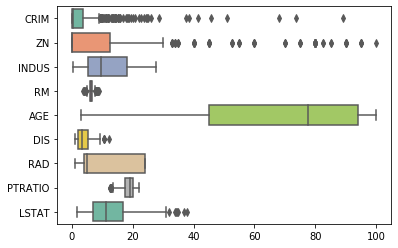

In [6]:
ax = sns.boxplot(data=df_2, orient="h", palette="Set2")

Text(0.5, 0, 'Crime rate per capital in %')

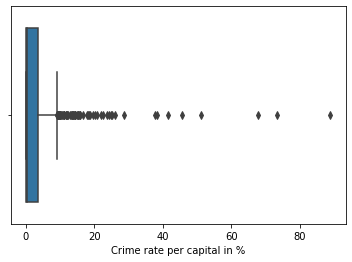

In [7]:
ax = sns.boxplot(x=df["CRIM"])
ax.set_xlabel('Crime rate per capital in %')

In [8]:
#Turkey's method
def turkey_method(df, variable):
    #Takes two parameters: dataframe & variable of interest as string
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    inner_fence = 1.5*iqr
    outer_fence = 3*iqr

    #inner fence lower and upper end
    inner_fence_le = q1-inner_fence
    inner_fence_ue = q3+inner_fence

    #outter fence lower and upper end
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence

    outliers_prob = []
    outliers_poss = []
    for index, x in enumerate(df[variable]):
        if x <= outer_fence_le or x >= outer_fence_ue:
            outliers_prob.append(index)
    for index, x in enumerate(df[variable]):
        if x <= inner_fence_le or x >= inner_fence_ue:
            outliers_poss.append(index)
    return outliers_prob,outliers_poss

In [9]:
probable_outliers_tm, possible_outliers_tm = turkey_method(df, "CRIM")


In [10]:
print(probable_outliers_tm)

[374, 375, 376, 378, 379, 380, 381, 384, 385, 386, 387, 398, 400, 403, 404, 405, 406, 410, 412, 413, 414, 415, 417, 418, 425, 427, 437, 440, 468, 477]


In [11]:
print(possible_outliers_tm)

[367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438, 439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478, 479]


In [12]:
#Transform 'CRIM' to log
log_CRIM = np.log(df['CRIM'])
df['CRIM_man'] = df['CRIM']+1
log_CRIM = np.log(df['CRIM_man'])
df['CRIM_log'] = log_CRIM

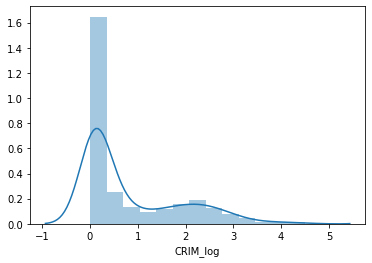

In [13]:
#Plot
sns.distplot(df['CRIM_log'])

In [14]:
#Calculate probable and possible outliers using log-iq method
probable_outliers_logiq, possible_outliers_logiq = turkey_method(df, 'CRIM_log')

In [15]:
print(probable_outliers_logiq)

[]


In [16]:
print(possible_outliers_logiq)

[380, 404, 405, 410, 414, 418]


In [17]:
#Internally studentized method (z-score)
def z_score_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index = 0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [18]:
outlier_z = z_score_method(df, 'CRIM')

In [19]:
print(outlier_z)

[380, 398, 404, 405, 410, 414, 418, 427]


In [20]:
#MAD method
def mad_method(df, variable_name):
    #Takes two parameters: dataframe & variable of interest as string
    columns = df.columns
    med = np.median(df, axis = 0)
    mad = np.abs(stats.median_absolute_deviation(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index == item
    for i, v in enumerate(df.loc[:, variable_name]):
        t = (v-med[index])/mad[index]
        if t > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [21]:
outlier_mad = mad_method(df, 'CRIM')

In [22]:
print(outlier_mad)

[20, 31, 32, 34, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 153, 154, 155, 156, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 310, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487]
